In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
movie_data=pd.read_csv('/content/IMDb Movies India.csv',encoding='latin1')

In [8]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [9]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
movie_data.shape

(15509, 10)

In [ ]:
movie_data.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
movie_data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
movie_data.dropna(subset=['Rating'],inplace=True)
movie_data.isnull().sum()

,0
Name,0
Year,0
Duration,2068
Genre,102
Rating,0
Votes,0
Director,5
Actor 1,125
Actor 2,200
Actor 3,292


In [ ]:
movie_data.dropna(subset=['Actor 1','Actor 2','Actor 3','Genre','Director'],inplace=True)


In [ ]:
movie_data.isnull().sum()

,0
Name,0
Year,0
Duration,1899
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [ ]:
movie_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [24]:
movie_data['Votes'] = movie_data['Votes'].astype(str).str.replace(',', '')
movie_data['Votes'] = pd.to_numeric(movie_data['Votes'], errors='coerce')
movie_data['Votes'] = movie_data['Votes'].fillna(0).astype(int)


In [17]:
movie_data['Year'] = pd.to_numeric(movie_data['Year'].str.strip('()'), errors='coerce')
# Fill NaN values with a suitable replacement, like 0 or the median year
movie_data['Year'] = movie_data['Year'].fillna(0).astype('int64')
# Or using median
#movie_data['Year'] = movie_data['Year'].fillna(movie_data['Year'].median()).astype('int64')

In [18]:
movie_data['Duration']=movie_data['Duration'].str.strip('min')


In [26]:
movie_data['Duration'] = pd.to_numeric(movie_data['Duration'].str.strip('min'), errors='coerce') # Convert 'Duration' to numeric, handling errors
movie_data['Duration'].fillna(movie_data['Duration'].median(),inplace=True) # Fill NaN values with median

<ipython-input-26-c66cccede23a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movie_data['Duration'].fillna(movie_data['Duration'].median(),inplace=True) # Fill NaN values with median


In [ ]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int64  
 2   Duration  5659 non-null   object 
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int64  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 649.5+ KB


In [ ]:
movie_data.isnull().sum()

,0
Name,0
Year,0
Duration,1899
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [81]:
movie_data.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,0,131.0,[nan],NaN,0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109.0,[nan],7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90.0,[nan],NaN,0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110.0,[nan],4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105.0,[nan],NaN,0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
top_movie=movie_data.loc[movie_data['Rating'].sort_values(ascending=False)[:10].index]

In [ ]:
top_movie

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020,94,"Drama, Romance",10.0,5,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021,79,"Music, Romance",9.7,7,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,2020,NaN,Drama,9.6,48,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
14222,The Reluctant Crime,2020,113,Drama,9.4,16,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
5077,Gho Gho Rani,2019,105,"History, Romance",9.4,47,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
6852,June,2021,93,Drama,9.4,18,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
12673,Secrets of Sinauli,2021,56,"Documentary, History",9.3,1373,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
5125,God of gods,2019,90,Documentary,9.3,46,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma
8344,Love Sorries,2021,101,"Comedy, Drama, Romance",9.3,79,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta
1314,Ashok Vatika,2018,97,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi


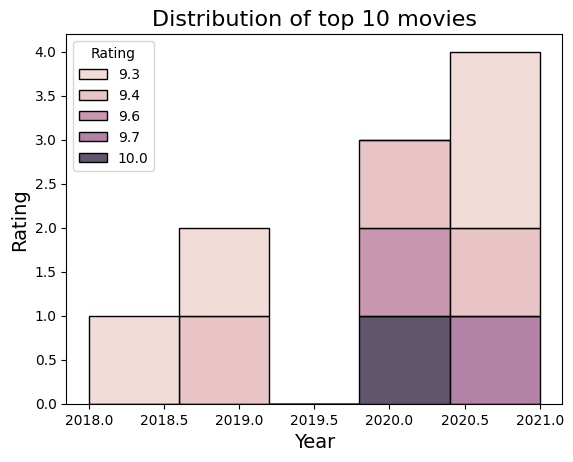

In [ ]:
sns.histplot(data=top_movie,x='Year',hue='Rating',multiple='stack')
plt.title('Distribution of top 10 movies',fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Rating',fontsize=14)
plt.show()

In [ ]:
genre_counts=movie_data['Genre'].value_counts().reset_index()
genre_counts.columns=['Genre','Count']
top_genres=genre_counts.head(10)
top_genres

,Genre,Count
0,Drama,1137
1,"Drama, Romance",443
2,"Action, Crime, Drama",417
3,Action,391
4,"Drama, Family",291
5,"Action, Drama",270
6,Comedy,251
7,"Comedy, Drama",237
8,Romance,226
9,"Comedy, Drama, Romance",213


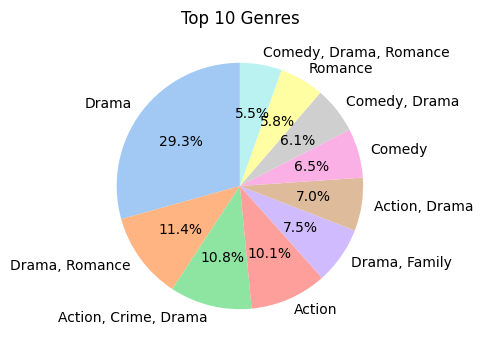

In [ ]:
plt.figure(figsize=(4,4))
plt.pie(top_genres['Count'],labels=top_genres['Genre'],autopct='%1.1f%%',startangle=90,colors=sns.color_palette('pastel'))
plt.title('Top 10 Genres')
plt.show()

In [ ]:
director_rating=movie_data.groupby('Director')['Rating'].mean().reset_index()
director_rating=director_rating.sort_values(by='Rating',ascending=False)
top_director=director_rating.head(15)
top_director

,Director,Rating
2243,Saif Ali Sayeed,10.0
2560,Sriram Raja,9.7
504,Bobby Kumar,9.6
322,Arvind Pratap,9.4
1513,Munni Pankaj,9.4
2598,Suhrud Godbole,9.4
1601,Nikhil Mahar,9.3
2809,Venkatesh Bk,9.3
1879,Rahul Mallick,9.3
1864,Raghav Jairath,9.3


<ipython-input-52-4060e984eab8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating',y='Director',data=top_director,palette='viridis')


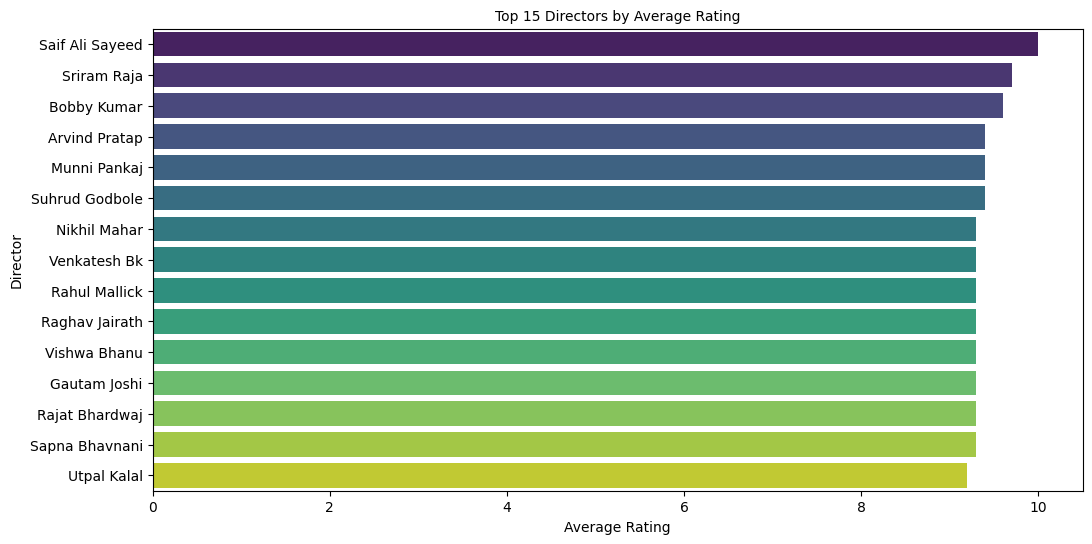

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='Rating',y='Director',data=top_director,palette='viridis')
plt.title('Top 15 Directors by Average Rating',fontsize=10)
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.show()

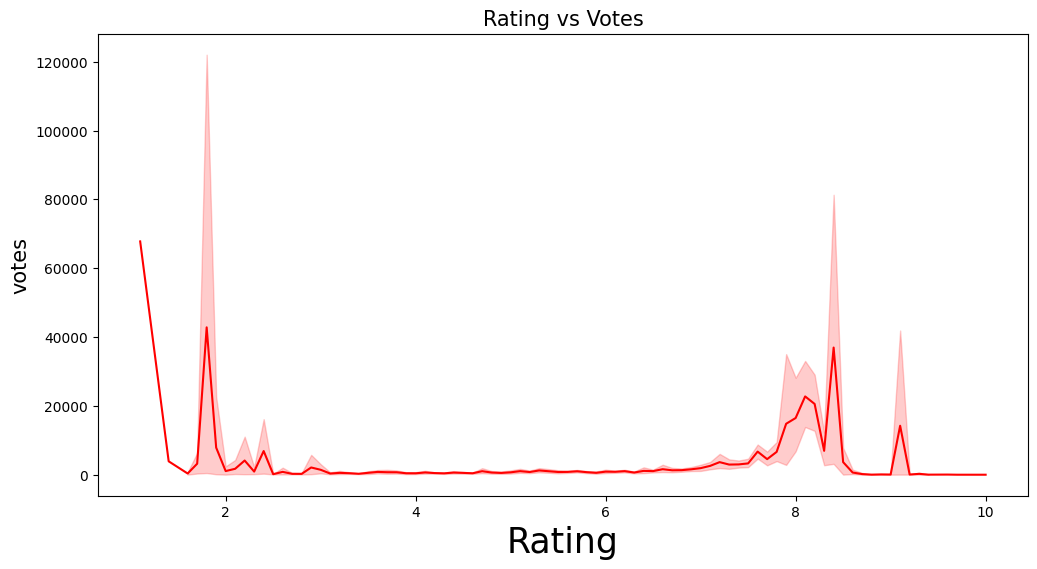

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=movie_data,x='Rating',y='Votes',color='red')
plt.title('Rating vs Votes',fontsize=15)
plt.xlabel('Rating',fontsize=25)
plt.ylabel('votes',fontsize=15)
plt.show()

In [10]:
actor_counts=movie_data['Actor 1'].value_counts().reset_index()
actor_counts.columns=['Actor','Moviecount']
top_actors=actor_counts.head(10)
top_actors

,Actor,Moviecount
0,Ashok Kumar,158
1,Dharmendra,140
2,Jeetendra,140
3,Mithun Chakraborty,133
4,Amitabh Bachchan,129
5,Rajesh Khanna,122
6,Dev Anand,93
7,Shashi Kapoor,91
8,Akshay Kumar,88
9,Sanjeev Kumar,83


<ipython-input-59-492227ed5cae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Moviecount',y='Actor',data=top_actors,palette='viridis')


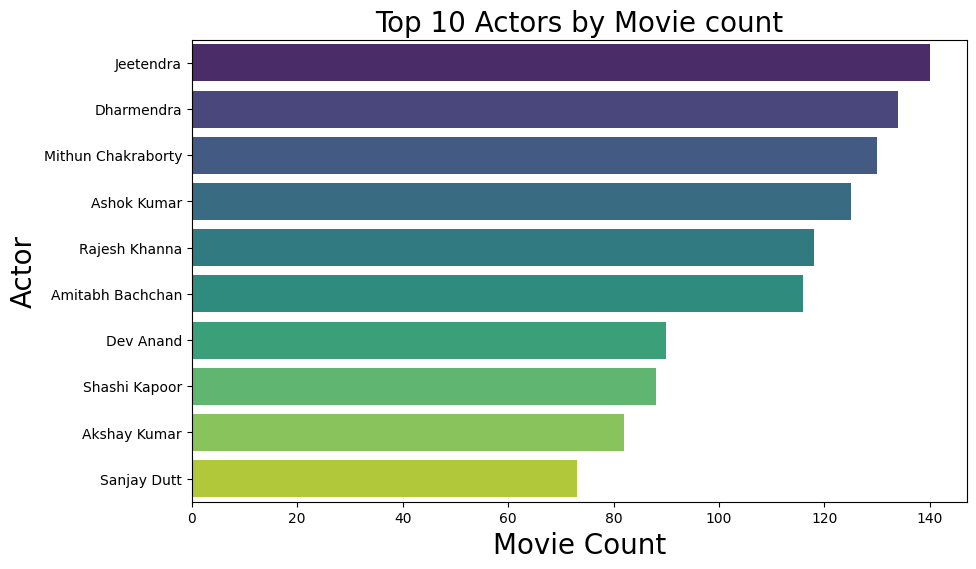

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='Moviecount',y='Actor',data=top_actors,palette='viridis')
plt.title('Top 10 Actors by Movie count',fontsize=20)
plt.xlabel('Movie Count',fontsize=20)
plt.ylabel('Actor',fontsize=20)
plt.show()

In [11]:
yearly_movie=movie_data['Year'].value_counts().reset_index()
yearly_movie.columns=['Year','Moviecount']
yearly_movie=yearly_movie.sort_values(by='Year')
yearly_movie

,Year,Moviecount
98,(1913),1
100,(1914),1
95,(1915),1
97,(1917),1
96,(1922),1
...,...,...
2,(2018),381
0,(2019),410
5,(2020),320
1,(2021),392


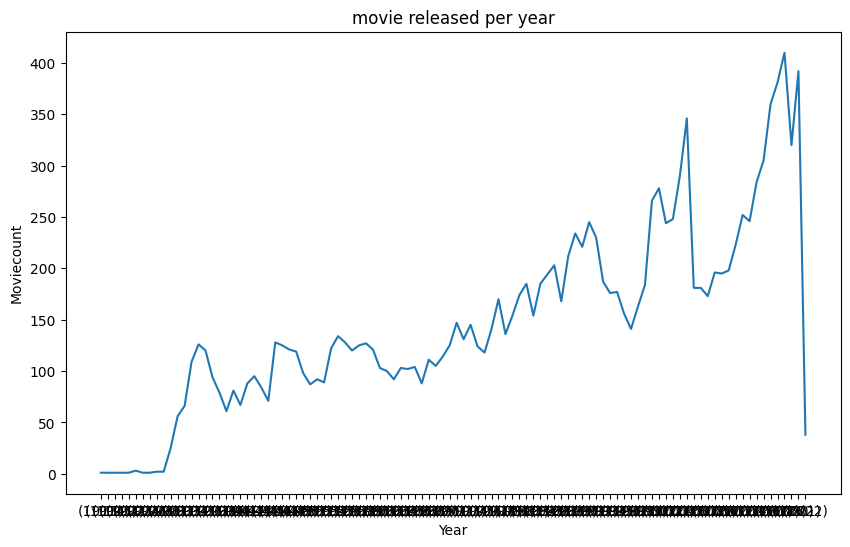

In [12]:
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_movie,x='Year',y='Moviecount')
plt.title('movie released per year')
plt.xlabel('Year')
plt.ylabel('Moviecount')
plt.show()

In [27]:
filtered_df=movie_data[(movie_data['Rating'] > 8)& (movie_data['Votes']>10000)]
filtered_df.head(10)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
75,3 Idiots,2009,170.0,"Comedy, Drama",8.4,357889,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
173,A Wednesday,2008,104.0,"Action, Crime, Drama",8.1,75118,Neeraj Pandey,Anupam Kher,Naseeruddin Shah,Jimmy Sheirgill
981,Anand,1971,122.0,"Drama, Musical",8.3,31937,Hrishikesh Mukherjee,Rajesh Khanna,Amitabh Bachchan,Sumita Sanyal
1009,Andaz Apna Apna,1994,160.0,"Action, Comedy, Romance",8.1,50810,Rajkumar Santoshi,Aamir Khan,Salman Khan,Raveena Tandon
1019,Andhadhun,2018,139.0,"Crime, Drama, Music",8.2,77901,Sriram Raghavan,Ayushmann Khurrana,Tabu,Radhika Apte
1285,Article 15,2019,130.0,"Crime, Drama, Mystery",8.2,25706,Anubhav Sinha,Ayushmann Khurrana,Nassar,Manoj Pahwa
1877,Barfi!,2012,151.0,"Comedy, Drama, Romance",8.1,77377,Anurag Basu,Ranbir Kapoor,Priyanka Chopra Jonas,Ileana D'Cruz
2065,Bhaag Milkha Bhaag,2013,186.0,"Biography, Drama, Sport",8.2,62636,Rakeysh Omprakash Mehra,Farhan Akhtar,Sonam Kapoor,Pawan Malhotra
2412,Black,2005,122.0,Drama,8.2,33782,Sanjay Leela Bhansali,Amitabh Bachchan,Rani Mukerji,Shernaz Patel
2425,Black Friday,2004,143.0,"Action, Crime, Drama",8.5,19493,Anurag Kashyap,Kay Kay Menon,Pawan Malhotra,Aditya Srivastav


<ipython-input-45-821994bf138c>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right')


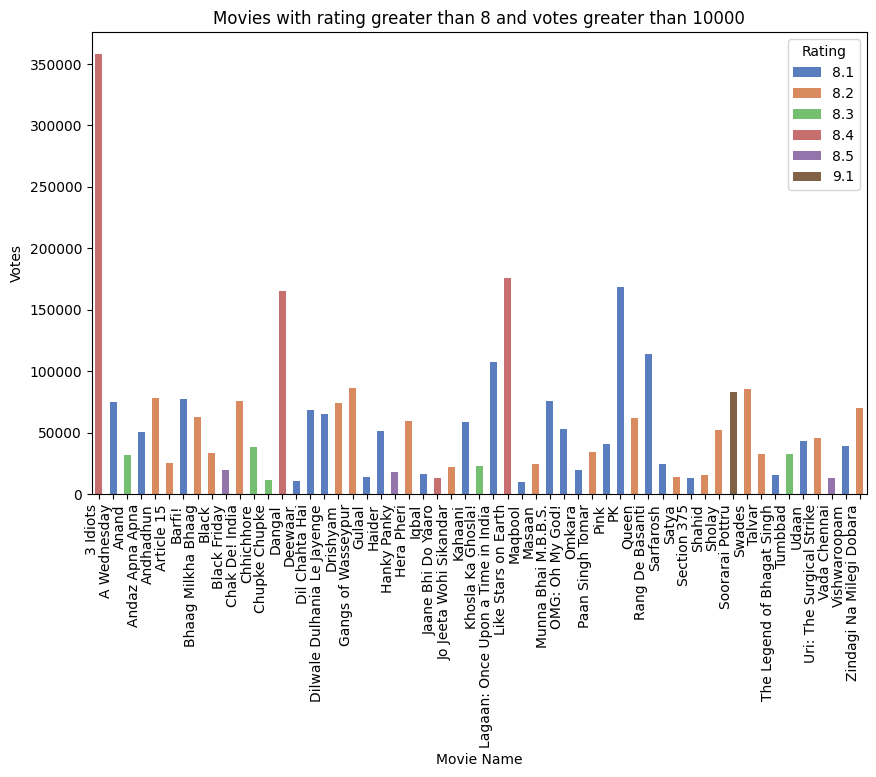

In [45]:
plt.figure(figsize=(10,6))
ax=sns.barplot(data=filtered_df,x='Name',y='Votes',hue='Rating',dodge=False,width=0.5,palette='muted')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right')
ax.set_xlabel('Movie Name')
ax.set_ylabel('Votes')
ax.set_title('Movies with rating greater than 8 and votes greater than 10000')
plt.show()

In [60]:
movie_data['Genre'] = movie_data['Genre'].astype(str).str.split(',')
genre_data = movie_data.explode('Genre')

genre_data=movie_data.explode('Genre')
genre_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,0,131.0,nan,NaN,0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109.0,nan,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90.0,nan,NaN,0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110.0,nan,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105.0,nan,NaN,0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,131.0,nan,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,1999,129.0,nan,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,2005,131.0,nan,NaN,0,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,1988,131.0,nan,NaN,0,NaN,NaN,NaN,NaN


<ipython-input-68-1772cb2bc9bf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=genre_data,x='Genre',order=genre_data['Genre'].value_counts().index,palette='viridis')


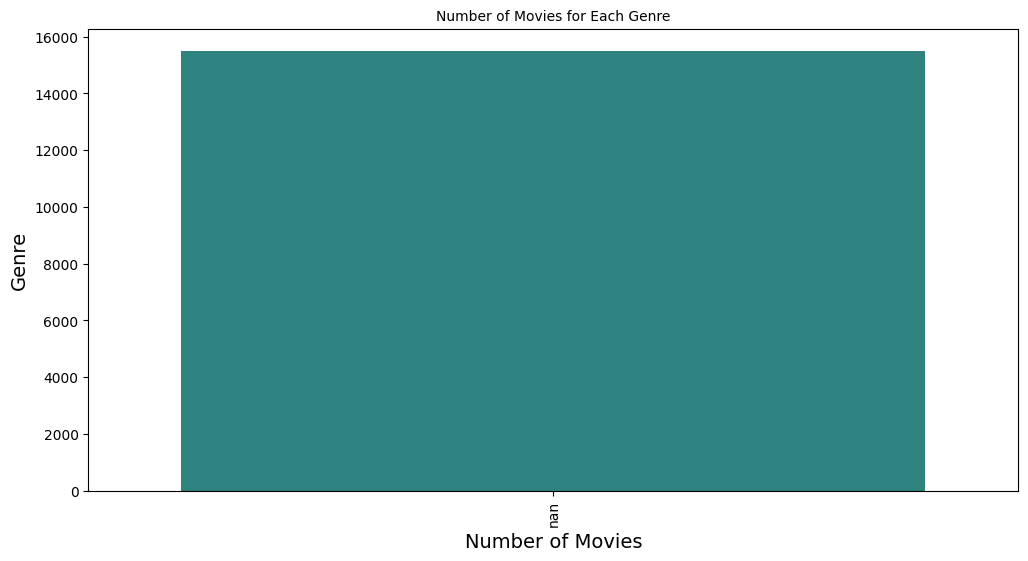

In [68]:
plt.figure(figsize=(12,6))
sns.countplot(data=genre_data,x='Genre',order=genre_data['Genre'].value_counts().index,palette='viridis')
plt.title('Number of Movies for Each Genre',fontsize=10)
plt.xlabel('Number of Movies',fontsize=14)
plt.ylabel('Genre',fontsize=14)
plt.xticks(rotation=90)
plt.show()

In [65]:
average_rating_by_genre=genre_data.groupby('Genre')['Rating'].mean().reset_index()
average_rating_by_genre=average_rating_by_genre.sort_values(by='Rating',ascending=False)







<ipython-input-67-7afa34aac5d5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_rating_by_genre,y='Rating',x='Genre',palette='coolwarm')


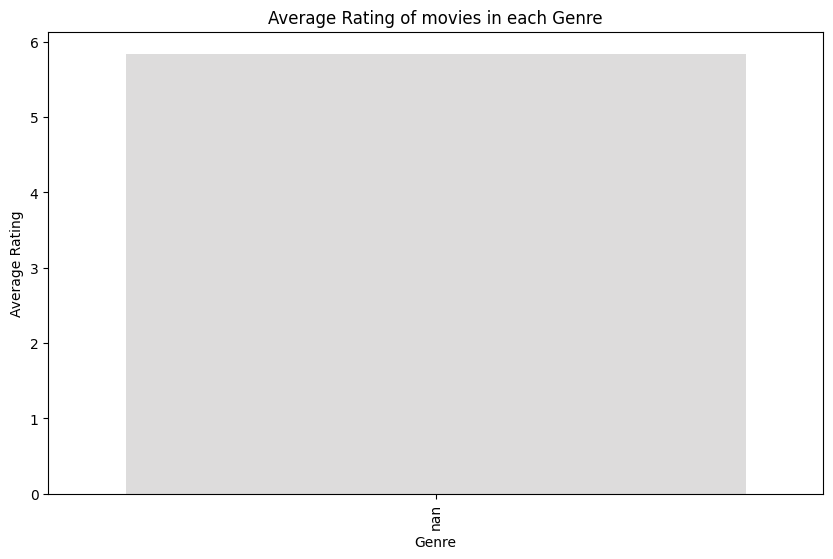

In [67]:
plt.figure(figsize=(10,6))
sns.barplot(data=average_rating_by_genre,y='Rating',x='Genre',palette='coolwarm')
plt.title('Average Rating of movies in each Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()


In [51]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
trans_data=movie_data.drop(['Name'],axis=1)
trans_data['Director']=labelencoder.fit_transform(trans_data['Director'])
trans_data['Actor 1']=labelencoder.fit_transform(trans_data['Actor 1'])
trans_data['Actor 2']=labelencoder.fit_transform(trans_data['Actor 2'])
trans_data['Actor 3']=labelencoder.fit_transform(trans_data['Actor 3'])
trans_data['Genre'] = movie_data['Genre'].astype(str)
trans_data['Genre']=labelencoder.fit_transform(trans_data['Genre'])
trans_data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0,131.0,0,NaN,0,1926,2250,800,3108
1,2019,109.0,0,7.0,8,1548,3280,4790,527
2,2021,90.0,0,NaN,0,5123,3713,2866,3450
3,2019,110.0,0,4.4,35,3319,2917,1504,4020
4,2010,105.0,0,NaN,0,385,3112,3462,405


In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
sc_data=scaler.fit_transform(trans_data)
sc_df=pd.DataFrame(sc_data,columns=trans_data.columns)
sc_df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.000000,0.404389,0.0,NaN,0.000000,0.324352,0.476897,0.163566,0.644813
1,0.998516,0.335423,0.0,0.662921,0.000014,0.260694,0.695210,0.979350,0.109336
2,0.999505,0.275862,0.0,NaN,0.000000,0.862748,0.786986,0.585974,0.715768
3,0.998516,0.338558,0.0,0.370787,0.000059,0.558942,0.618270,0.307504,0.834025
4,0.994065,0.322884,0.0,NaN,0.000000,0.064837,0.659602,0.707831,0.084025


In [54]:
corr_data=trans_data.corr(numeric_only=True)
corr_data['Rating'].sort_values(ascending=False)


,Rating
Rating,1.000000
Votes,0.126635
Actor 3,0.060049
Actor 2,0.059205
Actor 1,0.039774
Director,-0.008283
Duration,-0.024139
Year,-0.166673
Genre,NaN


<Axes: >

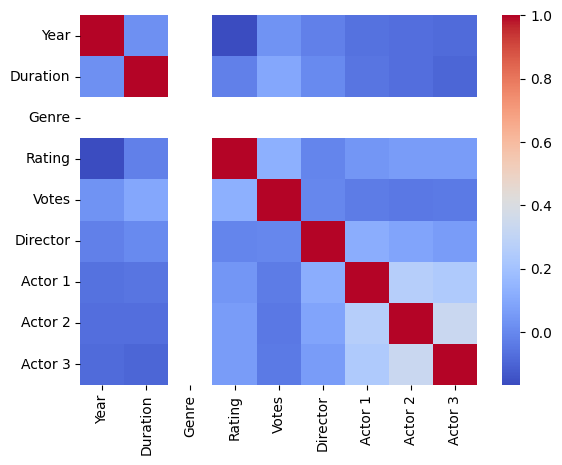

In [69]:
sns.heatmap(corr_data,annot=False,cmap='coolwarm')


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error,r2_score


In [71]:
X=trans_data.drop(['Rating'],axis=1)


In [72]:
Y=trans_data['Rating']

In [74]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
model=LinearRegression()
Y_train.fillna(Y_train.mean(), inplace=True)
model.fit(X_train,Y_train)

LinearRegression()

In [75]:
X_test=np.array(X_test)

In [77]:
Y_pred=model.predict(X_test)
Y_pred

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.9592764 , 5.89048095, 5.96369003, ..., 6.00780879, 5.83422878,
       5.86607846])

In [79]:
Y_test.fillna(Y_test.mean(), inplace=True)
print('R2 Score',r2_score(Y_test,Y_pred))
print('Mean squared error:',mean_squared_error(Y_test,Y_pred))
print('Mean absolute error:',mean_absolute_error(Y_test,Y_pred))

R2 Score 0.019472892859201618
Mean squared error: 0.9555688835848108
Mean absolute error: 0.593571427446569


In [80]:
print(Y_test)

11115    5.811802
2921     6.800000
3463     5.811802
2495     5.811802
15263    5.811802
           ...   
11391    5.500000
14647    5.811802
7238     5.811802
8747     5.811802
12012    5.800000
Name: Rating, Length: 4653, dtype: float64
